# Miami Plot

In this notebook we intend to show how can be used the library `IDEAL-GENOM` to generate a Miami Plot. 

In [1]:
import sys
import os

import pandas as pd

import ipywidgets as widgets
from IPython.display import display

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from luxgiant_dstream.manhattan_type import miami_draw

At the end of the next cell, please fill the required values. The notebook could be modified according to the user interest and particular requirements, nevertheless in order to use as it is, the user should have the following specifications in mind. It is expected that all files are tab-separated-values, but the user can change this easily on the corresponding cell.

1. `input_path` is the path to the folder where the necessary files to draw the plot are.
2. `top_name`  and `bottom_name` are the names of the files containing the **GWAS** summary statistics of the upper and lower plots respectively.
3. `top_highlights` and `bottom_highlights` are the names of the files containing the top hits to highlight on the upper and lower plots respectively.
4. `top_annotate` and `bottom_annotate` are the names of the files containing the rsID of the SNPs to annotate on the upper and lower plots respectively.

Usually one annotate a subset of the highlighted SNPs, but we give the freedom to annotate a different set of SNPs.

In [2]:
# create interactive widgets for input
input_path = widgets.Text(
    value='/home/luis/data/gwasResult/',
    description='Path to project folder:',
    style={'description_width': 'initial'}
)

top_name = widgets.Text(
    value='annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid',
    description='Name of GWAS summary file (top):',
    style={'description_width': 'initial'}
)

top_highlight = widgets.Text(
    value='table_lead_SNPS_GWAS_glm_logistic_final_paper',
    description='Name of file with SNPs to highlight (top):',
    style={'description_width': 'initial'}
)

top_annotate = widgets.Text(
    value='table_lead_SNPS_GWAS_glm_logistic_final_paper',
    description='Name of file with SNPs to annotate (top):',
    style={'description_width': 'initial'}
)

bottom_name = widgets.Text(
    value='european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.tsv',
    description='Name of GWAS reference summary file:',
    style={'description_width': 'initial'}
)

bottom_highlight = widgets.Text(
    value='highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv',
    description='Name of file with SNPs to highlight (bottom):',
    style={'description_width': 'initial'}
)

bottom_annotate = widgets.Text(
    value='highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv',
    description='Name of file with SNPs to annotate (bottom):',
    style={'description_width': 'initial'}
)

# display the widgets
display(input_path, top_name, top_highlight, top_annotate, bottom_name, bottom_highlight, bottom_annotate)

# function to get the parameter values
def get_params():
    return input_path.value, top_name.value, top_highlight.value, top_annotate.value, bottom_name.value, bottom_highlight.value, bottom_annotate.value

Text(value='/home/luis/data/gwasResult/', description='Path to project folder:', style=TextStyle(description_w…

Text(value='annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid', descrip…

Text(value='table_lead_SNPS_GWAS_glm_logistic_final_paper', description='Name of file with SNPs to highlight (…

Text(value='table_lead_SNPS_GWAS_glm_logistic_final_paper', description='Name of file with SNPs to annotate (t…

Text(value='european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.tsv', description='Name of GWAS re…

Text(value='highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv', description='Nam…

Text(value='highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv', description='Nam…

In [3]:
# get and print the parameter values
path_params = get_params()
print(f"Parameter 1: {path_params[0]}")
print(f"Parameter 2: {path_params[1]}")
print(f"Parameter 3: {path_params[2]}")
print(f"Parameter 4: {path_params[3]}")
print(f"Parameter 5: {path_params[4]}")
print(f"Parameter 6: {path_params[5]}")
print(f"Parameter 7: {path_params[6]}")

Parameter 1: /home/luis/data/gwasResult/
Parameter 2: annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid
Parameter 3: table_lead_SNPS_GWAS_glm_logistic_final_paper
Parameter 4: table_lead_SNPS_GWAS_glm_logistic_final_paper
Parameter 5: european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.tsv
Parameter 6: highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv
Parameter 7: highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv


Please, provide the columns to load from the **GWAS** summary statistics. The essential columns are those that contains chromosome, base-pair position, rsID and p-value. It is important to remark that columns names most coincide in both files, at least for the four columns that will be used to generate the Miami plot.

In [4]:
upper_cols_touse = widgets.Textarea(
    value="#CHROM, POS, ID, P",
    description='Columns to use on the upper plot (comma-separated):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)
display(upper_cols_touse)

def get_upper_cols():
    return upper_cols_touse.value

Textarea(value='#CHROM, POS, ID, P', description='Columns to use on the upper plot (comma-separated):', layout…

In [5]:
upper_cols = get_upper_cols()

df_top = pd.read_csv(
    os.path.join(path_params[0], path_params[1]), sep='\t', usecols=[col.strip() for col in upper_cols.split(',')]
)
df_top.head(5)

,#CHROM,POS,ID,P
0,1,727242,rs61769339,0.355696
1,1,727717,rs61769340,0.517232
2,1,730869,rs200188737,0.510707
3,1,732369,rs1315713498,0.741994
4,1,740738,rs146067153,0.816063


In [6]:
lower_cols_touse = widgets.Textarea(
    value="CHR, POS, SNP, p",
    description='Columns to use on the lower plot (comma-separated):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)
display(lower_cols_touse)

def get_lower_cols():
    return lower_cols_touse.value

Textarea(value='CHR, POS, SNP, p', description='Columns to use on the lower plot (comma-separated):', layout=L…

In [7]:
lower_cols = get_lower_cols()

df_bottom = pd.read_csv(
    os.path.join(path_params[0], path_params[4]), sep='\t', usecols=[col.strip() for col in lower_cols.split(',')]
)
df_bottom.head(5)

,SNP,CHR,POS,p
0,rs561234294,1,54591,0.44350
1,rs2462492,1,54676,0.12870
2,rs534350410,1,79188,0.44590
3,rs574556077,1,82994,0.49540
4,rs114608975,1,86028,0.07745


In [8]:
# use this cell to uniformize column names
df_bottom.columns = ['ID', '#CHROM', 'POS', 'P']

In [9]:
top_rsID = widgets.Text(
    value='SNP',
    description='Column name with the rsID (top):',
    style={'description_width': 'initial'}
)

display(top_rsID)

def get_top_rsID():
    return top_rsID.value

Text(value='SNP', description='Column name with the rsID (top):', style=TextStyle(description_width='initial')…

In [10]:
upper_rsID = get_top_rsID()

if path_params[2] is not None or path_params[2] != '':
    top_highlit_path = os.path.join(path_params[0], path_params[2])
    if os.path.exists(top_highlit_path):
        df_high_top = pd.read_csv(
            top_highlit_path, sep='\t'
        )
        top_to_highlight = df_high_top[upper_rsID].to_list()
        print(top_to_highlight[:10])
        del df_high_top
    else:
        print('Path to file with SNPs to highlight does not exist (top)')
        top_to_highlight = []
else:
    print('No file with SNPs to highlight (top)')
    top_to_highlight = []

['rs3747973', 'rs74990530', 'rs34311866', 'rs356182', 'rs7681440', 'rs1846190', 'rs2517680', 'rs4909940', 'rs528813377', 'rs56328224']


In [11]:
if path_params[3] is not None and path_params[3] != '':
    top_anno_path = os.path.join(path_params[0], path_params[3])
    if os.path.exists(top_anno_path):
        df_anno_top = pd.read_csv(
            top_anno_path, sep='\t'
        )
        top_to_annotate = df_anno_top[upper_rsID].to_list()
        print(top_to_annotate[:10])
        del df_anno_top
    else:
        print('Path to file with SNPs to annotate does not exist (top)')
        top_to_annotate = []
else:
    print('No file with SNPs to annotate (top)')
    top_to_annotate = []

['rs3747973', 'rs74990530', 'rs34311866', 'rs356182', 'rs7681440', 'rs1846190', 'rs2517680', 'rs4909940', 'rs528813377', 'rs56328224']


In [12]:
bottom_rsID = widgets.Text(
    value='SNP',
    description='Column name with the rsID (bottom):',
    style={'description_width': 'initial'}
)

display(bottom_rsID)

def get_bottom_rsID():
    return bottom_rsID.value

Text(value='SNP', description='Column name with the rsID (bottom):', style=TextStyle(description_width='initia…

In [13]:
lower_rsID = get_bottom_rsID()

if path_params[5] is not None and path_params[5] != '':
    bottom_highlit_path = os.path.join(path_params[0], path_params[5])
    if os.path.exists(bottom_highlit_path):
        df_high_bottom = pd.read_csv(
            bottom_highlit_path, sep='\t'
        )
        bottom_to_highlight = df_high_bottom[lower_rsID].to_list()
        print(bottom_to_highlight[:10])
        del df_high_bottom
    else:
        print('Path to file with SNPs to highlight does not exist (bottom)')
        bottom_to_highlight = []
else:
    print('No file with SNPs to highlight (bottom)')
    bottom_to_highlight = []

['rs114138760', 'rs35749011', 'rs76763715', 'rs6658353', 'rs11578699', 'rs823118', 'rs11557080', 'rs4653767', 'rs10797576', 'rs76116224']


In [14]:
if path_params[6] is not None and path_params[6] != '':
    bottom_anno_path = os.path.join(path_params[0], path_params[6])
    if os.path.exists(bottom_anno_path):
        df_anno_bottom = pd.read_csv(
            bottom_anno_path, sep='\t'
        )
        bottom_to_annotate = df_anno_bottom[lower_rsID].to_list()
        print(bottom_to_annotate[:10])
        del df_anno_bottom
    else:
        print('Path to file with SNPs to annotate does not exist (bottom)')
        bottom_to_annotate = []
else:
    print('No file with SNPs to annotate (bottom)')
    bottom_to_annotate = []

['rs114138760', 'rs35749011', 'rs76763715', 'rs6658353', 'rs11578699', 'rs823118', 'rs11557080', 'rs4653767', 'rs10797576', 'rs76116224']


In [15]:
SNP_col = widgets.Text(
    value='ID',
    description='Column with rsID:',
    style={'description_width': 'initial'}
)

CHR_col = widgets.Text(
    value='#CHROM',
    description='Column with chromosome:',
    style={'description_width': 'initial'}
)

POS_col = widgets.Text(
    value='POS',
    description='Column with base-pair position:',
    style={'description_width': 'initial'}
)

P_col = widgets.Text(
    value='P',
    description='Column with p-values:',
    style={'description_width': 'initial'}
)
display(SNP_col, CHR_col, POS_col, P_col)

def get_col_names():
    return SNP_col.value, CHR_col.value, POS_col.value, P_col.value

Text(value='ID', description='Column with rsID:', style=TextStyle(description_width='initial'))

Text(value='#CHROM', description='Column with chromosome:', style=TextStyle(description_width='initial'))

Text(value='POS', description='Column with base-pair position:', style=TextStyle(description_width='initial'))

Text(value='P', description='Column with p-values:', style=TextStyle(description_width='initial'))

In [16]:
snp_col, chr_col, pos_col, p_col = get_col_names()

2024/10/29 11:57:22  -Using user-provided gtf:/home/luis/CGE/luxgiant-dstream/GCF_000001405.40_GRCh38.p14_genomic.gtf
2024/10/29 11:57:22  -Using user-provided gtf:/home/luis/CGE/luxgiant-dstream/GCF_000001405.40_GRCh38.p14_genomic.gtf


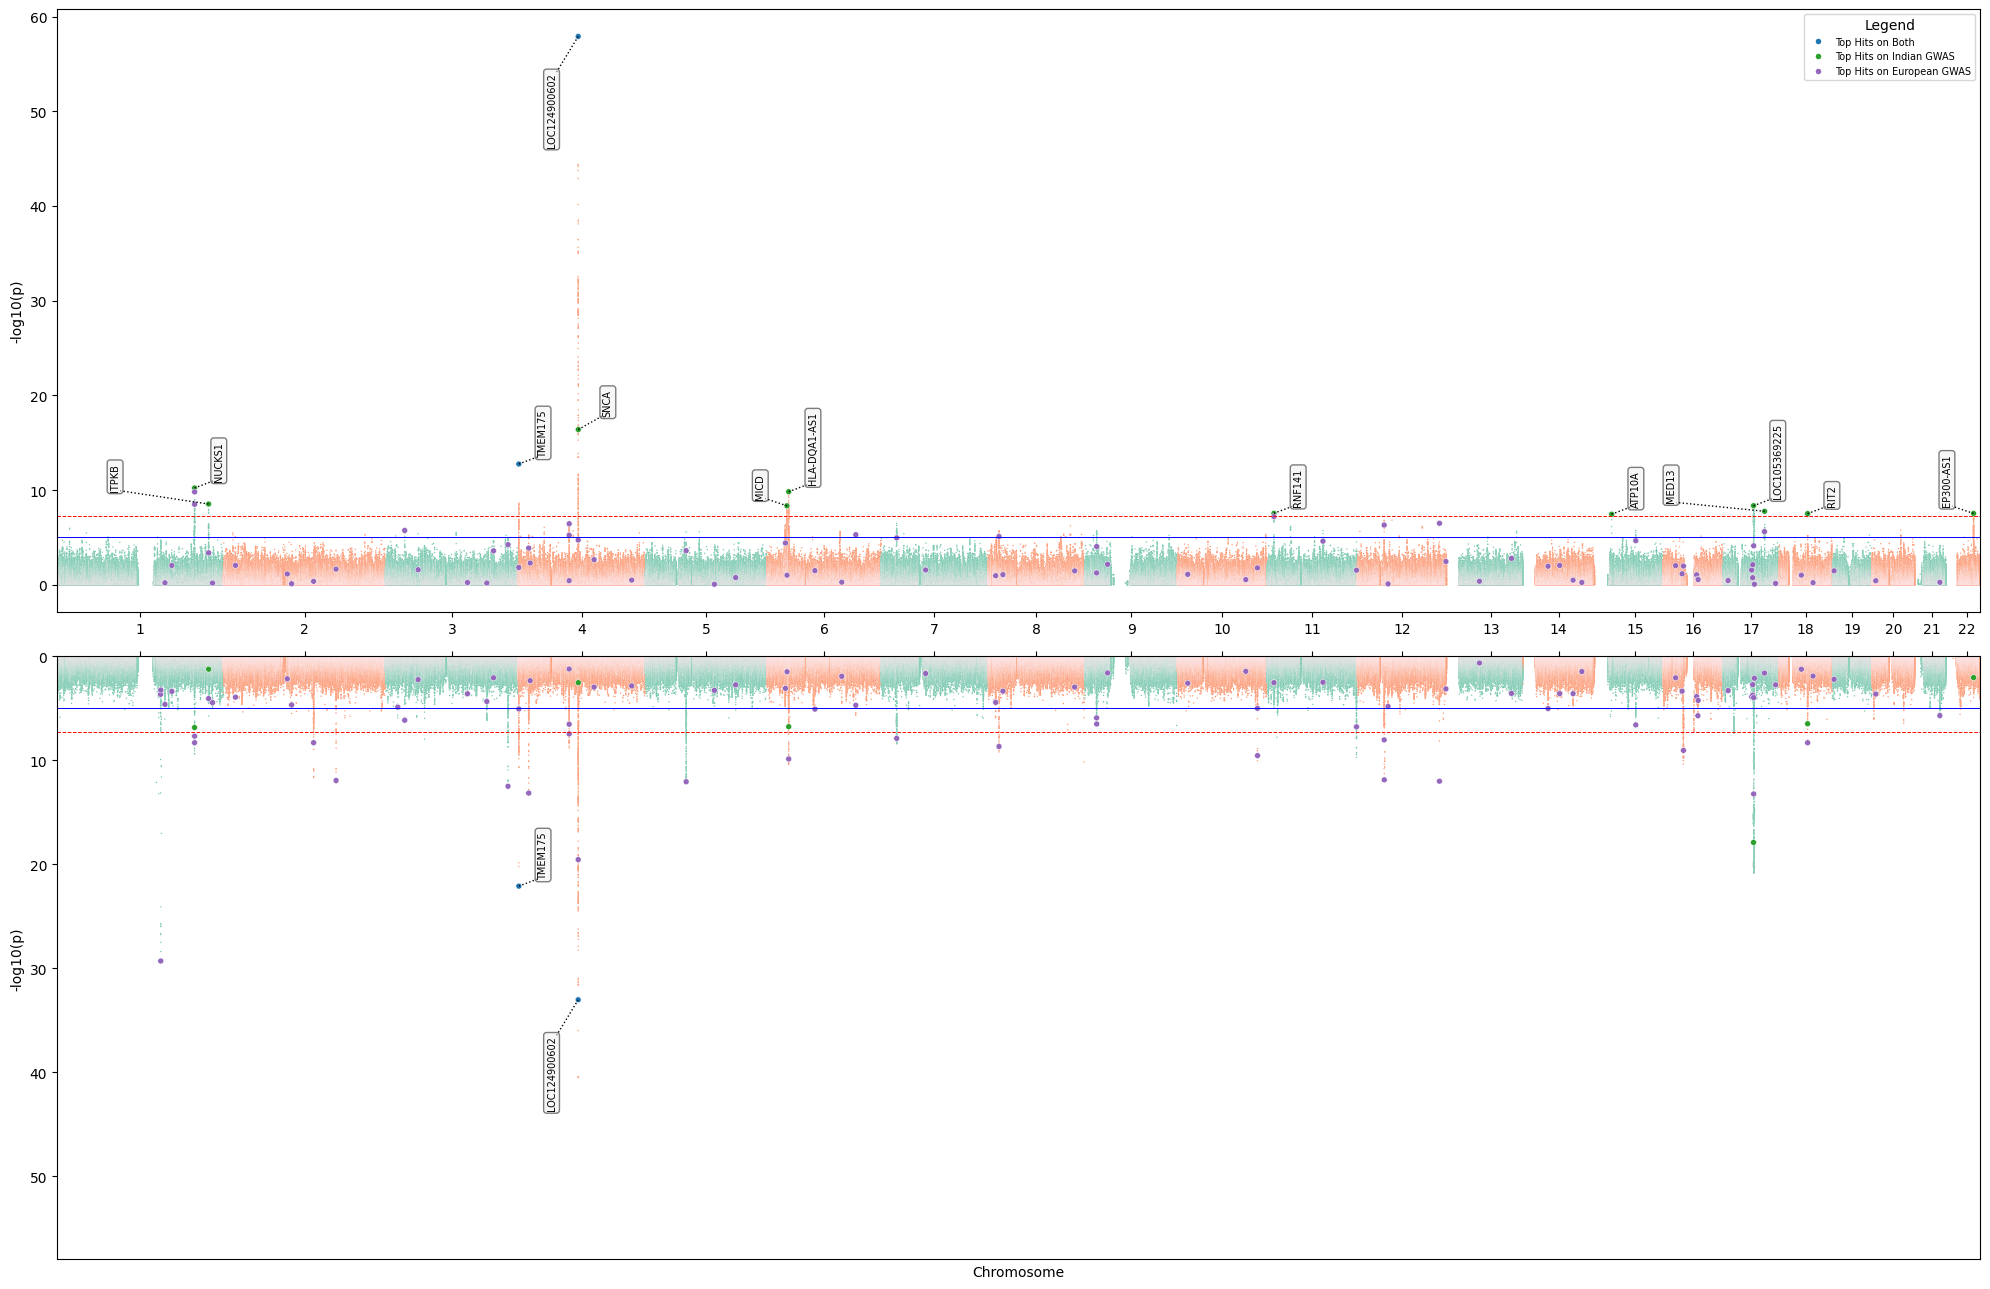

True

In [17]:
miami_draw(
    df_top            =df_top, 
    df_bottom         =df_bottom,
    snp_col           =snp_col,
    chr_col           =chr_col,
    pos_col           =pos_col,
    p_col             =p_col,
    plots_dir         =path_params[0], 
    top_highlights    =top_to_highlight, 
    top_annotations   =top_to_annotate,
    bottom_highlights =bottom_to_highlight, 
    bottom_annotations=[snp for snp in bottom_to_annotate if snp in top_to_annotate],
    save_name         = 'miami_plot_indian_vs_european.pdf',
    legend_top        ='Indian GWAS',
    legend_bottom     ='European GWAS'
)